# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.964863e+01     7.076740e+00
 * time: 0.0036890506744384766
     1     2.239907e+01     3.343629e+00
 * time: 0.011990070343017578
     2     1.666113e+01     3.267194e+00
 * time: 0.017544984817504883
     3     1.221560e+01     1.995468e+00
 * time: 0.022382020950317383
     4     1.020926e+01     1.064267e+00
 * time: 0.02725505828857422
     5     9.566243e+00     1.379576e+00
 * time: 0.03108692169189453
     6     9.153147e+00     7.717925e-01
 * time: 0.03522801399230957
     7     8.833271e+00     6.248908e-01
 * time: 0.03937101364135742
     8     8.587682e+00     5.203829e-01
 * time: 0.043702125549316406
     9     8.418928e+00     4.727801e-01
 * time: 0.04892611503601074
    10     8.291524e+00     5.405343e-01
 * time: 0.055355072021484375
    11     8.196977e+00     3.649804e-01
 * time: 0.06176590919494629
    12     8.119846e+00     3.621331e-01
 * time: 0.0685269832611084
    13     8.039499e+00     3.591730e-01
 *

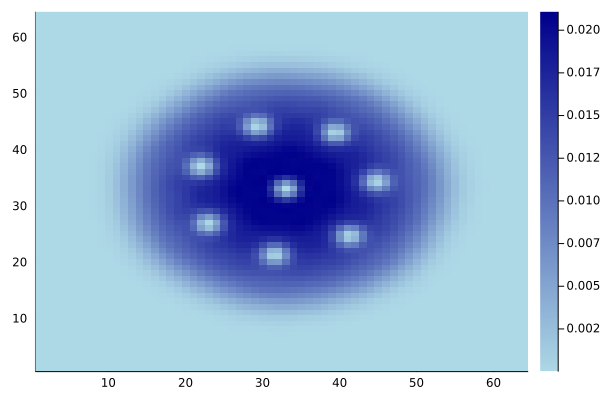

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)